<img src="Capa.png" alt="ebac-logo">

---

# **Trevi** | Python: Climate Change: Earth Surface Temperature Data

Caderno de **Códigos**<br> 
Desenvolvedor [Enzo Schitini](https://enzo-schitini.bubbleapps.io/version-test/)

---

## -> `Definição`

### `Sobre a função do programa`

Olá, meu nome é `Enzo Schitini` e sou um estudante de Ciência de Dados apaixonado por causas ambientais, por isso desenvolvi um programa em Python que analisa dados sobre as temperaturas do solo do nosso planeta nos últimos 250 anos.

O programa Trevi foi projetado para coletar e analisar uma vasta quantidade de dados sobre temperaturas do solo, mais de 230 mil linhas de dados. Com estes dados, que abrangem um período de 250 anos, os algoritmos do Trevi fornecem uma visão detalhada das variações climáticas ao longo do tempo.

Depois de coletados e analisados ​​os dados, o programa cria um gráfico que mostra as temperaturas médias ao longo dos anos. Este gráfico oferece uma representação visual do aumento das temperaturas globais, tornando as alterações climáticas uma questão tangível e compreensível.

Decidi criar este projeto porque sou apaixonado pelas questões ambientais. Acredito firmemente que a ciência de dados pode ser uma ferramenta poderosa para aumentar a consciencialização sobre as alterações climáticas.

Trevi nos mostra como a tecnologia e a ciência de dados podem ser usadas para enfrentar alguns dos desafios mais urgentes do nosso tempo. O seu programa não só fornece informações valiosas sobre as alterações climáticas, mas também serve como um lembrete do papel que cada um de nós pode desempenhar na proteção do nosso planeta.

`Informações sobre o conjunto de dados`

Os dados foram fornecidos pelo `Kaggle`, há uma enorme quantidade de dados para montar um estudo de longo prazo das tendências climáticas. Os dados iniciais foram coletados por técnicos por meio de termômetros de mercúrio, onde qualquer variação no tempo de visita afetava as medições. Na década de 1940, a construção do aeroporto fez com que muitas estações meteorológicas fossem movidas. Na década de 1980, houve uma mudança para termômetros eletrônicos que supostamente tinham um viés de resfriamento. 

### `TREVI 0.1`

In [11]:
# Set progama para começar escolha 1 ou 2
# GlobalTemperatures -> program = 1
# Base -> program = 2

progama = 1

`Program Version 1.0`

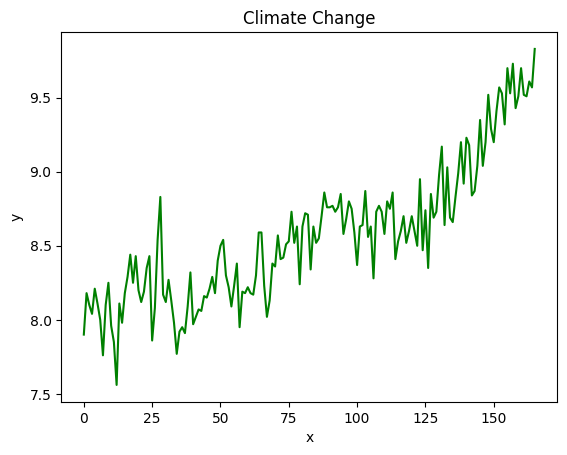

In [12]:
# TREVI
import time
from functools import reduce

# Tabela Base
###############################################

def limpar():
 with open(file='./base.csv', mode='w', encoding='utf8') as fp:
  fp.write("")
 time.sleep(1.0)

# Global Land Temperatures By Major City
###############################################

coletados = []

with open(file='./GlobalLandTemperaturesByMajorCity.csv', mode='r', encoding='utf8') as globaltabela:
  linha = globaltabela.readline() # lê a primeira linha
  linha = globaltabela.readline() # lê a segunda linha
  while linha: # Enquando uma condição for verdadeira
    linha_separada = linha.split(sep=',')
    num = str(linha_separada[1])
    line = str(linha_separada[0]) + ',' + str(linha_separada[1])
    if num != '':
     coletados.append(line)
     linha = globaltabela.readline()
    else:
      linha = globaltabela.readline()

limpar()

topo = 'dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty'

with open(file='./base.csv', mode='a', encoding='utf8') as fp:
  fp.write(topo)
  for x in coletados:
    linha = x + '\n'
    fp.write(linha)

def limpar():
 with open(file='./medias.csv', mode='w', encoding='utf8') as fp:
  fp.write("")
 time.sleep(1.0)

limpar()

# Global Temperatures -------------------------
###############################################

conteudo = []

def GlobalTemperatures():
 with open(file='./GlobalTemperatures.csv', mode='r', encoding='utf8') as arquivo:
  linha = arquivo.readline() # lê a primeira linha
  linha = arquivo.readline() # lê a segunda linha
  while linha: # Enquando uma condição for verdadeira
    linha_separada = linha.split(sep=',')
    num = str(linha_separada[7])
    if num != '':
     conteudo.append(linha)
     linha = arquivo.readline()
    else:
      linha = arquivo.readline()

# Atraves de BASE: ------------------------------------------------------
###############################################

def Base():
 with open(file='./base.csv', mode='r', encoding='utf8') as arquivo:
  linha = arquivo.readline() # lê a primeira linha
  linha = arquivo.readline() # lê a segunda linha
  while linha: # Enquando uma condição for verdadeira
    conteudo.append(linha)
    linha = arquivo.readline()

# Programa
###############################################
if progama == 1:
  GlobalTemperatures()
elif progama == 2:
  Base()
else:
  print("Erro!")

topo = 'dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty'

with open(file='./medias.csv', mode='a', encoding='utf8') as fp:
  fp.write(topo)
  for x in conteudo:
    linha = x
    fp.write(linha)

time.sleep(1.5)  # suspends execution for 2.4 seconds

# Todos os anos
###############################################

anos = []

for x in conteudo:
    ot = x.split(sep=',')
    otd = ot[0]
    otd = otd.split(sep='-')
    ano = otd[0]
    anos.append(ano)

anos_sem_repeticao = list(set(anos))

anos_ordenados = sorted(anos_sem_repeticao)
anos = anos_ordenados

# Busca as médias da tabela
###############################################

todos = []
todos_x = []

for x in conteudo:
    x = x.split(sep=',')
    data = str(x[0])
    temperatura = str(x[1])
    todo = data + "," + temperatura
    todos.append(todo)

valores = []
todos_valores = []

for ano in anos:
 for x in todos:
    anos_sep = x.split(sep=',')
    anos_sep = anos_sep[0]
    anos_sep = anos_sep.split(sep='-')
    anos_sep = anos_sep[0]
    if anos_sep == ano:
        valor = x.split(sep=',')
        valor = float(valor[1])
        valores.append(valor)

 soma = reduce(lambda x, y: x + y, valores)
 d = float(soma)
 d = d / 12
 d = round(d, 2)
 todos_valores.append(d)
 valores = []

# Média por ano
###############################################

soma2 = reduce(lambda x, y: x + y, todos_valores)
quantidade_elementos = len(anos)
media = soma2 / quantidade_elementos
media = round(media, 2)

limpar()

topo = 'Ano, Média'

ordem = -1

with open(file='./medias.csv', mode='a', encoding='utf8') as fp:
  topo = topo + '\n'
  fp.write(topo)
  for x in range(166):
    ordem = ordem + 1
    linha = str(anos[ordem]) + "," + str(todos_valores[ordem]) + '\n'
    linha = str(linha)
    fp.write(linha)

# Trabalhando com gráficos - Pyplot
###############################################

grafico_dois = []

def media_total_x():
 media_total = reduce(lambda x,y: x + y, todos_valores)
 media_total = media_total / len(todos_valores)
 media_total = round(media_total, 2)
 return media_total
 # Média total = 1290.84

y = media_total_x()

def maior_menor_valor():
 ma = 0
 me = 0
 maior_valor = max(todos_valores)
 menor_valor = min(todos_valores)
 ma = maior_valor
 me = menor_valor
 return  ma, me

d = maior_menor_valor()[0]
v = maior_menor_valor()[1]
grafico_dois.append(v)
grafico_dois.append(y)
grafico_dois.append(d)

def graficos():

  import matplotlib.pyplot as plt
  x = todos_valores
  #y = [1, 4, 9, 16, 25, 36]

  plt.plot(x,color='green')
  plt.title('Climate Change')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.savefig('Gráfico')
  plt.show()

time.sleep(1.0)
graficos()

# Developed by Enzo Schitini | 28.09.2023